In [18]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [19]:
# Save file path to variable
gaming_csv = "GamingStudy_data.csv"

In [20]:
gaming_df = pd.read_csv(gaming_csv,encoding="ISO-8859-1")
gaming_df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,...,France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0,FRA,FRA
13460,14247,42057.81185,3,3,3,3,2,3,3,Extremely difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,20,23,25.0,USA,USA
13461,14248,42058.16964,0,0,0,0,0,0,0,Not difficult at all,...,Norway,Norway,Reddit,Multiplayer - online - with real life friends,Accept,0,32,10.0,NOR,NOR
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,...,Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0,CAN,CAN


In [21]:
gaming_df['Residence'].value_counts().nlargest(6)

USA            4569
Germany        1413
UK             1032
Canada          994
Netherlands     506
France          391
Name: Residence, dtype: int64

In [22]:
loc2_df=gaming_df.loc[gaming_df['Residence'].isin(["Germany","UK", "Canada","Netherlands","France"])]
loc2_df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
14,15,42052.39588,0,0,0,1,0,1,0,Not difficult at all,...,Canada,Canada,Reddit,Multiplayer - online - with strangers,Accept,2,13,33.0,CAN,CAN
16,17,42052.46977,1,0,1,1,0,1,0,Not difficult at all,...,UK,UK,Reddit,Multiplayer - offline (people in the same room),Accept,4,15,36.0,GBR,GBR
21,22,42052.65303,3,3,3,2,0,1,3,Extremely difficult,...,Germany,Germany,Other,Multiplayer - online - with online acquaintanc...,Accept,15,9,37.0,DEU,DEU
22,23,42052.66261,0,0,0,1,1,1,0,Not difficult at all,...,Canada,Canada,Reddit,Singleplayer,Accept,3,31,5.0,CAN,CAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13453,14239,42056.82696,2,0,0,1,1,0,0,Somewhat difficult,...,Germany,Germany,Reddit,Multiplayer - online - with strangers,Accept,4,30,34.0,DEU,DEU
13457,14243,42057.13327,1,2,2,2,0,0,0,Somewhat difficult,...,Netherlands,Netherlands,Reddit,Multiplayer - online - with strangers,Accept,7,5,33.0,NLD,NLD
13459,14246,42057.75678,1,0,0,1,0,1,1,Not difficult at all,...,France,France,Reddit,Multiplayer - online - with strangers,Accept,4,28,7.0,FRA,FRA
13462,14249,42058.24420,3,2,1,3,0,1,3,Somewhat difficult,...,Canada,Canada,Reddit,Singleplayer,Accept,13,16,32.0,CAN,CAN


In [23]:
loc_df = gaming_df.loc[gaming_df['Residence'] == "USA", :]
loc_df

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
5,6,42052.13119,0,0,0,0,0,1,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,1,17,13.0,USA,USA
6,7,42052.14622,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,16,26.0,USA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13451,14237,42056.67219,0,0,1,0,0,1,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,2,27,33.0,USA,USA
13452,14238,42056.81326,1,0,1,0,0,0,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,2,17,23.0,USA,USA
13454,14240,42056.97403,1,1,1,1,1,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with real life friends,Accept,6,12,NaN,USA,USA
13458,14245,42057.35267,0,1,1,1,0,2,1,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,6,16,12.0,USA,USA


In [24]:
gaming_type2_df = loc2_df["Game"]
gaming_type2_df

2                    Other
14                   Other
16                   Other
21             Starcraft 2
22                   Other
               ...        
13453    League of Legends
13457    League of Legends
13459                Other
13462                Other
13463          Starcraft 2
Name: Game, Length: 4336, dtype: object

In [25]:
gaming_type_df = loc_df["Game"]
gaming_type_df

0                   Skyrim
1                    Other
3                    Other
5                    Other
6                    Other
               ...        
13451    League of Legends
13452    League of Legends
13454    League of Legends
13458    League of Legends
13460    League of Legends
Name: Game, Length: 4569, dtype: object

In [26]:
gaming_type_df .nunique()

11

In [27]:
gaming_type_df.value_counts()

League of Legends      3899
Other                   334
Starcraft 2             120
Counter Strike           80
World of Warcraft        43
Hearthstone              28
Diablo 3                 20
Skyrim                   14
Guild Wars 2             13
Destiny                  12
Heroes of the Storm       6
Name: Game, dtype: int64

In [28]:
gaming_type2_df.value_counts()

League of Legends      3612
Other                   346
Counter Strike          115
Starcraft 2             109
World of Warcraft        45
Diablo 3                 39
Hearthstone              33
Heroes of the Storm      17
Guild Wars 2             10
Skyrim                    6
Destiny                   4
Name: Game, dtype: int64

<AxesSubplot:title={'center':'Number of Players Per Game'}, xlabel='Game Played', ylabel='Number of Responses '>

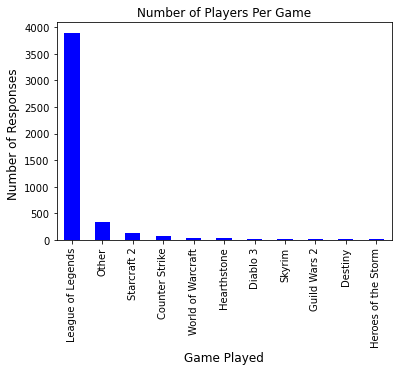

In [29]:
Bar_pandas = gaming_type_df.value_counts().plot.bar(color = 'b', )
Bar_pandas.set_title("Number of Players Per Game",fontsize = 12)
Bar_pandas.set_xlabel("Game Played",fontsize = 12)
Bar_pandas.set_ylabel("Number of Responses ",fontsize = 12)
Bar_pandas

<AxesSubplot:title={'center':'Number of Players Per Game'}, xlabel='Game Played', ylabel='Number of Responses '>

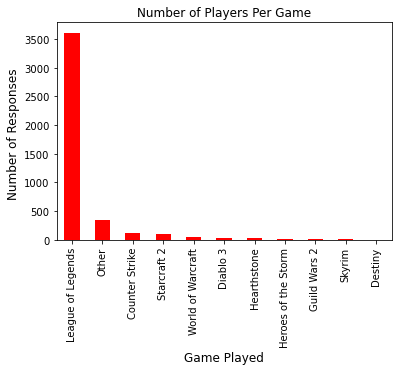

In [30]:
Bar_pandas = gaming_type2_df.value_counts().plot.bar(color = 'r', )
Bar_pandas.set_title("Number of Players Per Game",fontsize = 12)
Bar_pandas.set_xlabel("Game Played",fontsize = 12)
Bar_pandas.set_ylabel("Number of Responses ",fontsize = 12)
Bar_pandas

<AxesSubplot:title={'center':'Number of Players Per Game'}, xlabel='Game Played', ylabel='Number of Responses '>

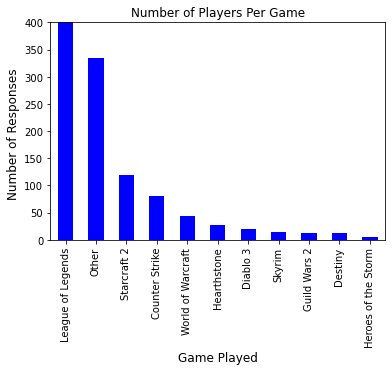

In [31]:
Bar_pandas = gaming_type_df.value_counts().plot.bar(color = 'b', )
Bar_pandas.set_title("Number of Players Per Game",fontsize = 12)
Bar_pandas.set_xlabel("Game Played",fontsize = 12)
Bar_pandas.set_ylabel("Number of Responses ",fontsize = 12)
Bar_pandas.set_ylim(0,400)
Bar_pandas

<AxesSubplot:title={'center':'Number of Players Per Game'}, xlabel='Game Played', ylabel='Number of Responses '>

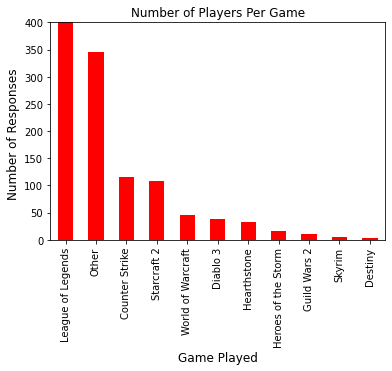

In [32]:
Bar_pandas = gaming_type2_df.value_counts().plot.bar(color = 'r', )
Bar_pandas.set_title("Number of Players Per Game",fontsize = 12)
Bar_pandas.set_xlabel("Game Played",fontsize = 12)
Bar_pandas.set_ylabel("Number of Responses ",fontsize = 12)
Bar_pandas.set_ylim(0,400)
Bar_pandas

In [33]:
# show that LOL is skewing the data, but it is important to touch on the fact it is so prominent across USA and the other top 5 countries
# try and find/show mental health answers for those who answered LOL vs all the other answers in the data set 

# filter, show everything except for LOL 

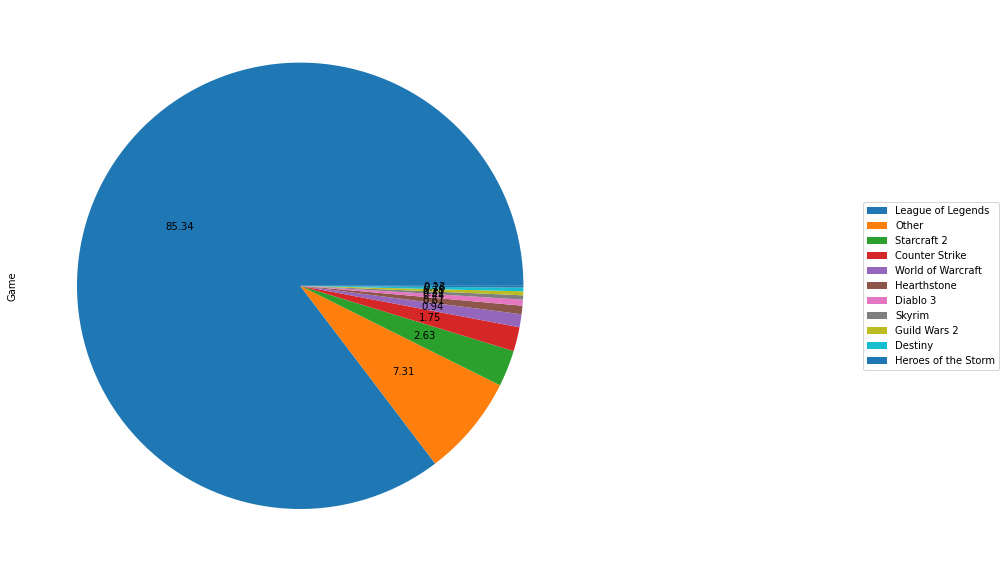

In [98]:
gaming = loc_df["Game"].value_counts()
gaming.plot(kind = "pie",autopct='%.2f',figsize= (10,15),labels = None)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), labels= gaming.index)

In [89]:
gaming.index

Index(['League of Legends', 'Other', 'Counter Strike', 'Starcraft 2',
       'World of Warcraft', 'Diablo 3', 'Hearthstone', 'Heroes of the Storm',
       'Guild Wars 2', 'Skyrim', 'Destiny'],
      dtype='object')

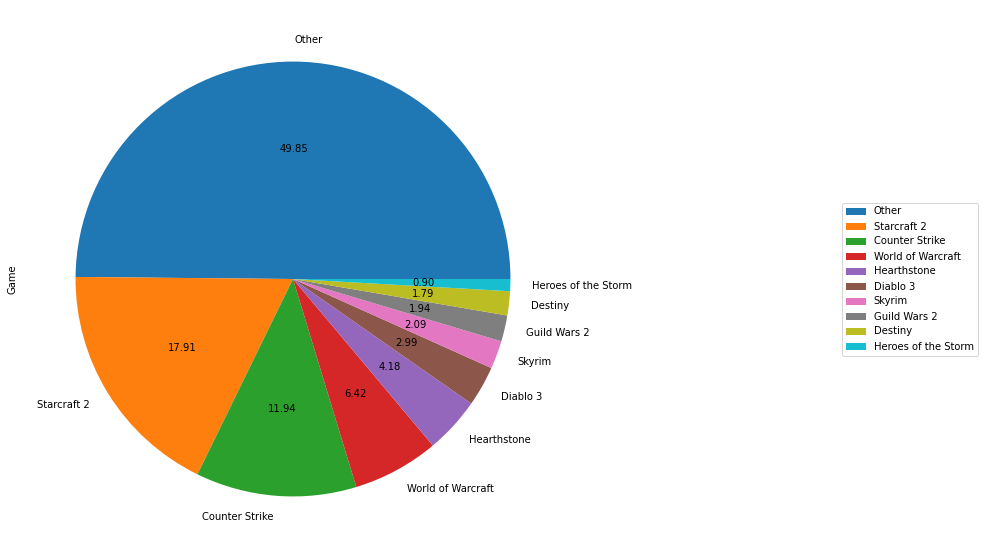

In [82]:
loc_df[~loc_df["Game"].isin(["League of Legends"])]["Game"].value_counts().plot(kind="pie",autopct='%.2f',figsize= (12,10))
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))

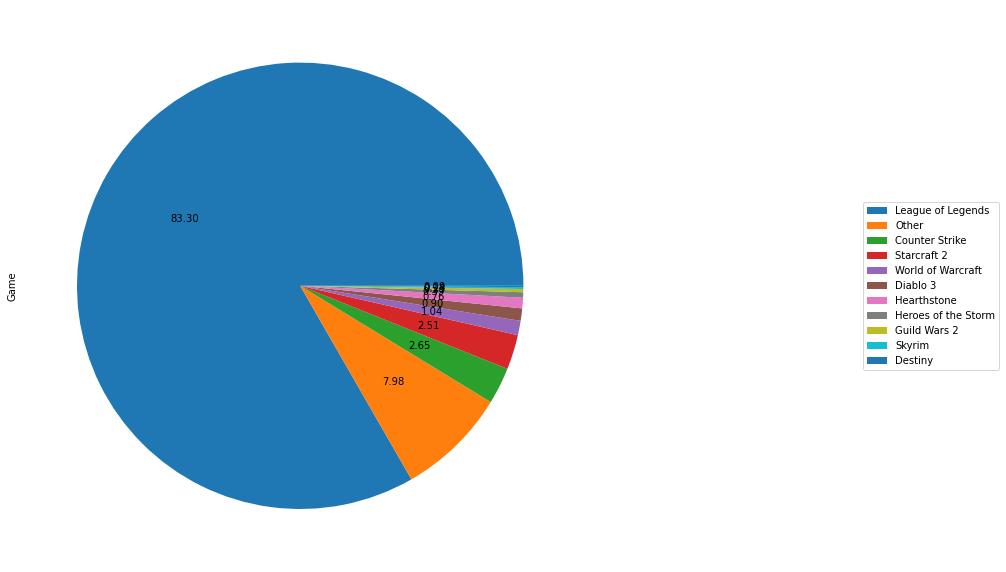

In [96]:
gaming = loc2_df["Game"].value_counts()
gaming.plot(kind = "pie",figsize= (10,15),autopct='%.2f',labels = None)
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5),labels=gaming.index)

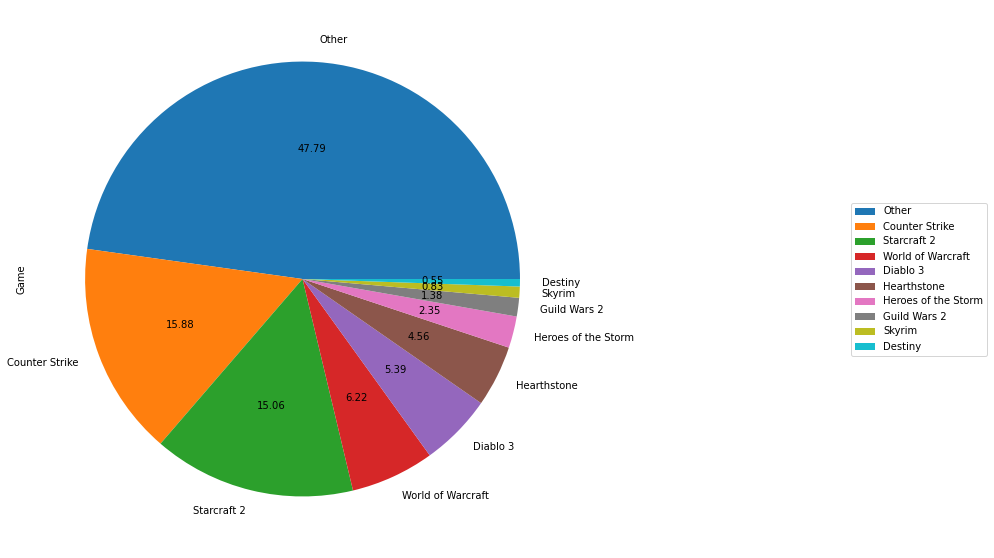

In [83]:
loc2_df[~loc2_df["Game"].isin(["League of Legends"])]["Game"].value_counts().plot(kind="pie",autopct='%.2f',figsize= (12,10))
plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))